# Inequalities of Marseille a long the metro M2

In [1]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
from datetime import datetime

import glob
import os
import pandas as pd
import numpy as np
import matplotlib
import json
import matplotlib.pyplot as plt
from functools import reduce

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 200
#matplotlib.rcParams['svg.fonttype'] = 'none'

In [2]:
#iris selction
iris_csv = 'iris_selection.csv'

iris_selection = pd.read_csv(iris_csv, header=0, names=['ligne', 'code_iris', 'lib_iris'])

In [3]:
iris_selection['code_iris'] = iris_selection['code_iris'].astype('str')

In [4]:
iris_selection['code_iris'].nunique()

50

In [5]:
#file path
area_file = 'data/area.csv'

area = pd.read_csv(area_file)

In [6]:
area_m2 = area.groupby(['ligne'], sort=False).area.sum()

In [7]:
area_m2 = area_m2 / 1000000

In [8]:
area_m2

ligne
Noailles                             0.343531
Saint-Charles                        0.488915
Joliette                             0.773686
Désirée Clary                        0.318969
Jules Guesde                         0.457264
National                             0.353858
Castellane                           0.629912
Notre-Dame-du-Mont - Cours Julien    0.238368
Périer                               0.605254
Rond-point du Prado                  1.191784
Sainte-Marguerite Dromel             0.747252
Bougainville                         0.853847
Name: area, dtype: float64

In [17]:
population_density = population_m2_pop_total / area_m2

In [18]:
population_density = population_density.reset_index()


In [19]:
population_density = population_density.rename(columns={0: 'population_density'})

## Famille

In [20]:
#file path
famille_file = 'data/base-ic-couples-familles-menages-2014.xls'

famille = pd.read_excel(famille_file, skiprows=5)

In [21]:
famille['IRIS'] = famille['IRIS'].astype('str')

In [22]:
famille_m2 = iris_selection.merge(famille, left_on='code_iris', right_on='IRIS')

In [23]:
famille_m2

,ligne,code_iris,lib_iris,IRIS,REG,DEP,UU2010,COM,LIBCOM,TRIRIS,...,C14_PMEN_CS8,C14_FAM,C14_COUPAENF,C14_FAMMONO,C14_COUPSENF,C14_NE24F0,C14_NE24F1,C14_NE24F2,C14_NE24F3,C14_NE24F4P
0,Bougainville,132150501,Zoccolat,132150501,93,13,00759,13215,Marseille 15e Arrondissement,131821,...,530.798851,599.652642,259.429843,175.277733,164.945066,205.036556,143.536123,124.058854,64.139093,62.882015
1,Bougainville,132140302,Casanova,132140302,93,13,00759,13214,Marseille 14e Arrondissement,131741,...,563.594165,492.832679,155.509173,201.257335,136.066172,168.376584,103.814845,128.263390,53.611210,38.766650
2,National,132030304,Briancon,132030304,93,13,00759,13203,Marseille 3e Arrondissement,130921,...,441.161336,339.277122,195.342149,94.678304,49.256669,76.229572,63.952582,77.020807,75.034391,47.039770
3,National,132030305,Bellevue Caravelle,132030305,93,13,00759,13203,Marseille 3e Arrondissement,130921,...,485.475760,292.776957,112.860490,161.457953,18.458514,38.397589,66.399785,58.637411,27.974854,101.367318
4,National,132030306,Bellevue-Pyat,132030306,93,13,00759,13203,Marseille 3e Arrondissement,130921,...,499.842968,215.072359,74.576313,98.162186,42.333860,66.055287,15.629371,19.340627,55.445219,58.601856
5,National,132030403,Fonscolombes,132030403,93,13,00759,13203,Marseille 3e Arrondissement,130931,...,363.833116,623.843711,324.716188,164.509219,134.618305,164.056944,153.055636,135.304657,104.665897,66.760577
6,Désirée Clary,132030401,Potier,132030401,93,13,00759,13203,Marseille 3e Arrondissement,130931,...,815.958813,651.247232,242.800698,208.231989,200.214545,277.539102,132.038411,110.180307,74.712680,56.776730
7,Désirée Clary,132030402,Peyssonnel,132030402,93,13,00759,13203,Marseille 3e Arrondissement,130931,...,412.068197,747.800065,241.959646,248.633700,257.206719,354.149068,186.363927,95.640533,79.042795,32.603742
8,Désirée Clary,132020402,Albrand-Ponteves,132020402,93,13,00759,13202,Marseille 2e Arrondissement,130871,...,503.849349,480.118187,167.285590,175.396405,137.436191,168.159892,119.426226,100.321980,49.402107,42.807982
9,Joliette,132020401,l'Eveche-Les Docks,132020401,93,13,00759,13202,Marseille 2e Arrondissement,130841,...,405.574088,760.390090,341.474880,147.543629,271.371581,300.102380,247.078826,144.578729,61.586559,7.043596


In [24]:
famille_m2_selection = famille_m2.groupby(['ligne'], sort=False)['C14_FAM', 'C14_COUPAENF', 'C14_FAMMONO', 'C14_COUPSENF', 'C14_NE24F0', 'C14_NE24F1', 'C14_NE24F2', 'C14_NE24F3', 'C14_NE24F4P'].sum() 

In [28]:
famille_m2_selection['percent_fammono'] = famille_m2_selection['C14_FAMMONO'] * 100 / famille_m2_selection['C14_FAM']
famille_m2_selection['percent_fam3enf'] = (famille_m2_selection['C14_NE24F3'] + famille_m2_selection['C14_NE24F4P'])  * 100 / famille_m2_selection['C14_FAM']

In [110]:
famille_m2_selection = famille_m2_selection.reset_index()

In [111]:
famille_m2_selection

,ligne,C14_FAM,C14_COUPAENF,C14_FAMMONO,C14_COUPSENF,C14_NE24F0,C14_NE24F1,C14_NE24F2,C14_NE24F3,C14_NE24F4P,percent_fammono,percent_fam3enf
0,Bougainville,1092.485321,414.939016,376.535068,301.011237,373.413140,247.350968,252.322244,117.750303,101.648666,34.465916,20.082555
1,National,1470.970150,707.495140,518.807662,244.667348,344.739392,299.037374,290.303503,263.120360,273.769520,35.269761,36.499033
2,Désirée Clary,1879.165483,652.045935,632.262093,594.857455,799.848063,437.828564,306.142821,203.157582,132.188454,33.645898,17.845477
3,Joliette,1839.581736,763.867390,467.172563,608.541783,696.011569,524.760537,393.812059,174.340628,50.656942,25.395586,12.230909
4,Jules Guesde,2047.935780,890.866271,619.505474,537.564035,745.469557,458.284829,443.677823,252.775299,147.728271,30.250239,19.556452
5,Saint-Charles,1921.798231,783.141496,544.832822,593.823913,681.740200,591.811609,302.580768,204.486206,141.179449,28.350157,17.986574
6,Noailles,1766.417382,632.544981,551.858567,582.013834,691.540043,506.744860,322.085616,151.062153,94.984709,31.241686,13.929146
7,Notre-Dame-du-Mont - Cours Julien,1616.406181,556.900632,415.039209,644.466340,710.224099,506.723973,292.280063,80.870532,26.307516,25.676666,6.630638
8,Castellane,3645.608628,1279.830182,811.421977,1554.356469,1790.895001,1032.720087,585.233729,171.604777,65.155035,22.257517,6.494384
9,Périer,2936.142102,1232.124223,502.103949,1201.913930,1378.864038,736.950911,588.902013,180.480544,50.944595,17.100805,7.881946


In [30]:
famille_m2_selection.to_csv('famille_m2.csv')

## Revenus

Data from: https://www.insee.fr/fr/statistiques/3288151, from December 2014

In [31]:
#file path
revenu_file = 'data/BASE_TD_FILO_DEC_IRIS_2014.xls'

revenu = pd.read_excel(revenu_file, skiprows=5)

In [32]:
revenu['IRIS'] = revenu['IRIS'].astype('str')

In [33]:
revenu_m2 = iris_selection.merge(revenu, left_on='code_iris', right_on='IRIS')

In [34]:
revenu_m2

,ligne,code_iris,lib_iris,IRIS,LIBIRIS,COM,LIBCOM,DEC_PIMP14,DEC_TP6014,DEC_Q114,...,DEC_D914,DEC_RD14,DEC_S80S2014,DEC_GI14,DEC_PTSA14,DEC_PCHO14,DEC_PBEN14,DEC_PPEN14,DEC_PAUT14,note
0,Bougainville,132150501,Zoccolat,132150501,Zoccolat,13215,Marseille 15e Arrondissement,13.441483,83.960059,1738.0,...,15030.0,NaN,1421.814867,0.502808,55.3,11.8,0.5,30.6,1.8,0
1,Bougainville,132140302,Casanova,132140302,Casanova,13214,Marseille 14e Arrondissement,27.017115,70.221704,870.0,...,20968.0,NaN,2267.168856,0.544484,55.1,6.3,1.6,34.8,2.2,0
2,National,132030304,Briancon,132030304,Briancon,13203,Marseille 3e Arrondissement,NaN,79.588993,2488.0,...,15916.0,NaN,140.373675,0.482422,NaN,NaN,NaN,NaN,NaN,0
3,National,132030306,Bellevue-Pyat,132030306,Bellevue-Pyat,13203,Marseille 3e Arrondissement,NaN,NaN,212.0,...,13504.0,NaN,NaN,0.534798,NaN,NaN,NaN,NaN,NaN,0
4,National,132030403,Fonscolombes,132030403,Fonscolombes,13203,Marseille 3e Arrondissement,21.021611,74.336283,2723.0,...,19686.0,NaN,99.594715,0.511922,61.8,8.7,3.0,25.5,1.0,0
5,Désirée Clary,132030401,Potier,132030401,Potier,13203,Marseille 3e Arrondissement,26.176471,72.052717,2078.0,...,21788.0,NaN,556.819773,0.542199,50.8,6.7,2.1,37.2,3.2,0
6,Désirée Clary,132030402,Peyssonnel,132030402,Peyssonnel,13203,Marseille 3e Arrondissement,41.413311,51.201201,4392.0,...,32100.0,1146.428571,40.635837,0.483874,61.5,4.3,2.5,27.8,3.9,1
7,Désirée Clary,132020402,Albrand-Ponteves,132020402,Albrand-Ponteves,13202,Marseille 2e Arrondissement,28.456221,69.284510,1494.0,...,24548.0,NaN,484.969755,0.547742,59.6,6.1,2.7,28.8,2.8,0
8,Joliette,132020401,l'Eveche-Les Docks,132020401,l'Eveche-Les Docks,13202,Marseille 2e Arrondissement,54.810883,36.766917,7138.0,...,41972.0,38.827012,25.677386,0.449899,75.4,4.6,4.2,11.6,4.2,0
9,Joliette,132020404,Mazenod-Republique,132020404,Mazenod-Republique,13202,Marseille 2e Arrondissement,38.530735,53.962901,4384.0,...,29034.0,116.136000,43.756620,0.482058,66.0,5.0,2.6,23.1,3.3,0


In [35]:
revenu_m2 = revenu_m2[['IRIS', 'DEC_MED14']]

In [47]:
revenu_m2_pop = population_active_m2.merge(revenu_m2, left_on='IRIS', right_on='IRIS')

In [48]:
revenu_m2_pop = revenu_m2_pop[['ligne', 'LIBIRIS', 'IRIS', 'DEC_MED14', 'P14_ACT1564']]

In [49]:
def calculate_revenue(item):
    return sum(item.DEC_MED14 * item.P14_ACT1564) / sum(item.P14_ACT1564)

In [50]:
revenu_m2_median = revenu_m2_pop.groupby(['ligne'], sort=False).apply(calculate_revenue)

In [51]:
revenu_m2_median = revenu_m2_median.reset_index()
revenu_m2_median = revenu_m2_median.rename(columns={0: 'revenue'})

In [52]:
revenu_m2_median

,ligne,revenue
0,Bougainville,5823.871765
1,National,6610.800486
2,Désirée Clary,8619.138290
3,Joliette,13713.126547
4,Jules Guesde,7086.807987
5,Saint-Charles,9499.187191
6,Noailles,9384.693783
7,Notre-Dame-du-Mont - Cours Julien,18128.413612
8,Castellane,20148.045058
9,Périer,26629.344782


In [53]:
revenu_m2_median.to_csv('revenue.csv', float_format='%.1f')

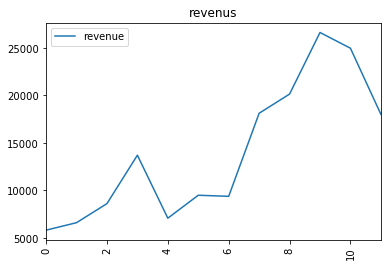

In [54]:
revenu_m2_median.plot(kind='line', rot=90, title='revenus')

## Population active

Data from: https://www.insee.fr/fr/statistiques/3137415#consulter

In [37]:
#file path
population_active_file = 'data/base-ic-activite-residents-2014.xls'

population_active = pd.read_excel(population_active_file, skiprows=5)

In [38]:
population_active['IRIS'] = population_active['IRIS'].astype('str')

In [39]:
population_active_m2 = iris_selection.merge(population_active, left_on='code_iris', right_on='IRIS')

In [40]:
population_active_m2_1564 = population_active_m2.groupby(['ligne'], sort=False)['P14_CHOM1564', 'P14_ACT1564'].sum()

In [41]:
population_active_m2_1564 = population_active_m2_1564.reset_index()

In [42]:
population_active_m2_1564['percent_1564'] = population_active_m2_1564['P14_CHOM1564'] * 100 / population_active_m2_1564['P14_ACT1564']
#population_active_m2['percent_1524'] = population_active_m2['P14_CHOM1524'] * 100 / population_active_m2['P14_ACT1524']

In [43]:
population_active_m2_1564

,ligne,P14_CHOM1564,P14_ACT1564,percent_1564
0,Bougainville,493.489859,1365.055010,36.151646
1,National,986.666982,2335.860058,42.239987
2,Désirée Clary,864.959447,2635.851181,32.815185
3,Joliette,828.389709,3626.151504,22.844873
4,Jules Guesde,1157.719150,3181.077353,36.393933
5,Saint-Charles,1060.890052,3723.995988,28.487948
6,Noailles,1407.990436,4312.483229,32.649181
7,Notre-Dame-du-Mont - Cours Julien,834.744904,3846.343192,21.702299
8,Castellane,1198.126534,7465.045733,16.049822
9,Périer,606.142600,5306.116377,11.423470


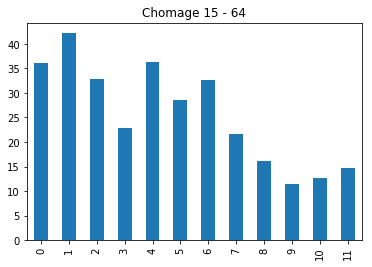

In [44]:
population_active_m2_1564['percent_1564'].plot(kind='bar', rot=90, title='Chomage 15 - 64')

In [45]:
population_active_m2_1564 = population_active_m2_1564.rename(columns={'percent_1564': 'chomage'})

In [46]:
population_active_m2_1564 = population_active_m2_1564[['ligne', 'chomage']]

## Population

Newest version I found so far: https://www.insee.fr/fr/statistiques/3137409, 2014

In [10]:
#file path
population_file = 'data/base-ic-evol-struct-pop-2014.xls'

population = pd.read_excel(population_file, skiprows=5)

In [11]:
population['IRIS'] = population['IRIS'].astype('str')

In [12]:
population_m2 = iris_selection.merge(population, left_on='code_iris', right_on='IRIS')

In [13]:
population_m2['code_iris'].nunique()

50

In [14]:
population_m2_pop_total = population_m2.groupby(['ligne'], sort=False).P14_POP.sum()

In [15]:
population_m2_pop_total

ligne
Bougainville                          4565.140065
National                              6842.917103
Désirée Clary                         7739.253046
Joliette                              7981.623750
Jules Guesde                         10094.498828
Saint-Charles                         9172.188066
Noailles                              9751.941774
Notre-Dame-du-Mont - Cours Julien     7081.357702
Castellane                           15830.686559
Périer                               11725.493630
Rond-point du Prado                  12163.482732
Sainte-Marguerite Dromel              7068.945821
Name: P14_POP, dtype: float64

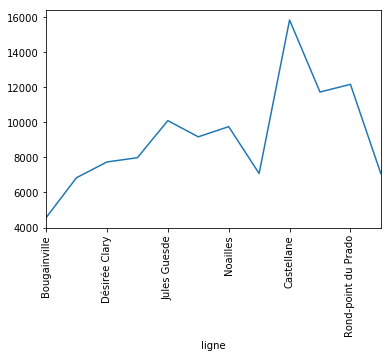

In [16]:
population_m2_pop_total.plot(kind='line', rot=90)

### Immigration

In [55]:
# nombre d'immigrés / "Migrationshintergrund"

population_m2_pop_imm = population_m2.groupby(['ligne'], sort=False).P14_POP_IMM.sum()

In [56]:
population_m2_pop_imm

ligne
Bougainville                         1031.248182
National                             2234.402124
Désirée Clary                        2082.572217
Joliette                             1780.759093
Jules Guesde                         3394.946341
Saint-Charles                        3294.030489
Noailles                             3275.283760
Notre-Dame-du-Mont - Cours Julien    1014.449601
Castellane                           1916.118969
Périer                               1379.566432
Rond-point du Prado                  1341.946083
Sainte-Marguerite Dromel              849.463320
Name: P14_POP_IMM, dtype: float64

In [57]:
# nombre de français

population_m2_pop_fr = population_m2.groupby(['ligne'], sort=False).P14_POP_FR.sum()

In [58]:
population_m2_pop_fr

ligne
Bougainville                          3643.259830
National                              5244.638428
Désirée Clary                         6197.947904
Joliette                              6583.418683
Jules Guesde                          7332.440131
Saint-Charles                         6514.700821
Noailles                              7265.833801
Notre-Dame-du-Mont - Cours Julien     6346.051563
Castellane                           14573.895215
Périer                               10861.774588
Rond-point du Prado                  11458.162832
Sainte-Marguerite Dromel              6621.698654
Name: P14_POP_FR, dtype: float64

In [59]:
# nombre d'étrangers

population_m2_pop_etr = population_m2.groupby(['ligne'], sort=False).P14_POP_ETR.sum()

In [60]:
population_m2_pop_etr

ligne
Bougainville                          921.880235
National                             1598.278675
Désirée Clary                        1541.305142
Joliette                             1398.205066
Jules Guesde                         2762.058697
Saint-Charles                        2657.487245
Noailles                             2486.107973
Notre-Dame-du-Mont - Cours Julien     735.306139
Castellane                           1256.791344
Périer                                863.719042
Rond-point du Prado                   705.319900
Sainte-Marguerite Dromel              447.247166
Name: P14_POP_ETR, dtype: float64

In [61]:
population_m2_immigration_df = pd.concat([population_m2_pop_total, population_m2_pop_etr, population_m2_pop_fr, population_m2_pop_imm], axis=1).reset_index()

In [62]:
population_m2_immigration_df['percent_immigration'] = population_m2_immigration_df['P14_POP_IMM'] * 100 / population_m2_immigration_df['P14_POP'] 

In [63]:
population_m2_immigration_df['percent_francais'] = population_m2_immigration_df['P14_POP_FR'] * 100 / population_m2_immigration_df['P14_POP'] 

In [64]:
population_m2_immigration_df['percent_etranger'] = population_m2_immigration_df['P14_POP_ETR'] * 100 / population_m2_immigration_df['P14_POP'] 

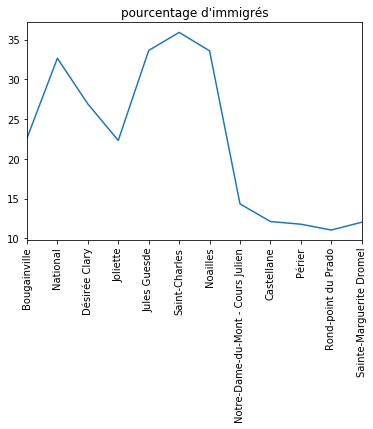

In [65]:
ax = population_m2_immigration_df['percent_immigration'].plot(xticks=population_m2_immigration_df.index, rot=90, title="pourcentage d'immigrés")
ax.set_xticklabels(population_m2_immigration_df.ligne)

### Age

In [66]:
# age, under 18, over 65

population_m2_pop_age = population_m2.groupby(['ligne'], sort=False, as_index=False)['P14_POP','P14_POP0002', 'P14_POP0305', 'P14_POP0610', 'P14_POP1117', 'P14_POP6579', 'P14_POP80P'].sum()

population_m2_pop_age['total_under_18'] = population_m2_pop_age['P14_POP0002'] + population_m2_pop_age['P14_POP0305'] + population_m2_pop_age['P14_POP0610'] + population_m2_pop_age['P14_POP1117']

population_m2_pop_age['total_over_65'] = population_m2_pop_age['P14_POP6579'] + population_m2_pop_age['P14_POP80P']

In [67]:
population_m2_pop_age['percent_under18'] = population_m2_pop_age['total_under_18'] * 100 / population_m2_pop_age['P14_POP']

population_m2_pop_age['percent_over65'] = population_m2_pop_age['total_over_65'] * 100 / population_m2_pop_age['P14_POP'] 

In [68]:
population_m2_pop_age = population_m2_pop_age[['ligne', 'total_under_18', 'total_over_65', 'percent_under18', 'percent_over65']]

In [69]:
population_m2_pop_age

,ligne,total_under_18,total_over_65,percent_under18,percent_over65
0,Bougainville,1375.637250,728.922304,30.133517,15.967140
1,National,2450.522613,645.977916,35.811081,9.440096
2,Désirée Clary,1896.160080,1384.781476,24.500557,17.892960
3,Joliette,1834.313696,893.933679,22.981711,11.199897
4,Jules Guesde,2263.987304,1731.597571,22.427932,17.153874
5,Saint-Charles,2094.468093,1045.560933,22.834989,11.399253
6,Noailles,1903.339606,1073.483504,19.517545,11.007895
7,Notre-Dame-du-Mont - Cours Julien,1270.731746,907.614875,17.944747,12.816961
8,Castellane,2468.102121,3369.555129,15.590620,21.284959
9,Périer,2128.091997,2701.272106,18.149274,23.037598


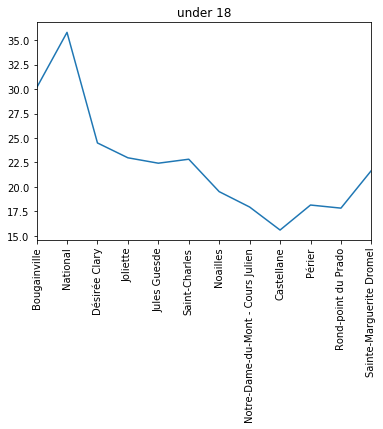

In [70]:
ax = population_m2_pop_age['percent_under18'].plot(xticks=population_m2_pop_age.index, rot=90, title="under 18")
ax.set_xticklabels(population_m2_pop_age.ligne)

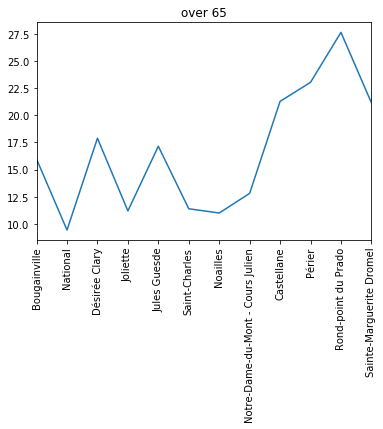

In [71]:
ax = population_m2_pop_age['percent_over65'].plot(xticks=population_m2_pop_age.index, rot=90, title="over 65")
ax.set_xticklabels(population_m2_pop_age.ligne)

## Logements
Data from: https://www.insee.fr/fr/statistiques/3141877?sommaire=2866354, 2014

In [3]:
from simpledbf import Dbf5

dbf_logement = Dbf5('data/FD_LOGEMTZE_2014.dbf')

df_logement = dbf_logement.to_dataframe()

In [16]:
df_logement.head()

,COMMUNE,ARM,IRIS,ACHL,AEMM,AEMMR,AGEMEN8,ANEM,ANEMR,ASCEN,...,STOCD,SURF,TACTM,TPM,TRANSM,TRIRIS,TYPC,TYPL,VOIT,WC
0,01001,ZZZZZ,ZZZZZZZZZ,311,2013,9,25,003,01,2,...,21,6,11,1,4,ZZZZZZ,1,1,2,Z
1,01001,ZZZZZ,ZZZZZZZZZ,311,2011,9,25,005,02,2,...,10,5,11,1,4,ZZZZZZ,1,1,2,Z
2,01001,ZZZZZ,ZZZZZZZZZ,212,1974,6,65,042,06,2,...,10,4,21,Z,Z,ZZZZZZ,1,1,1,Z
3,01001,ZZZZZ,ZZZZZZZZZ,311,2000,9,65,016,03,2,...,10,5,21,Z,Z,ZZZZZZ,1,1,1,Z
4,01001,ZZZZZ,ZZZZZZZZZ,212,1988,7,80,028,04,2,...,10,7,21,Z,Z,ZZZZZZ,1,1,0,Z


In [12]:
df_logement['IRIS'] = df_logement['IRIS'].astype('str')

In [13]:
logement_m2 = iris_selection.merge(df_logement, left_on='code_iris', right_on='IRIS')

In [429]:
logement_m2.to_csv('data/logement_m2.csv')

In [428]:
logement_m2

,Unnamed: 0,ligne,code_iris,lib_iris,COMMUNE,ARM,IRIS,ACHL,AEMM,AEMMR,...,STOCD,SURF,TACTM,TPM,TRANSM,TRIRIS,TYPC,TYPL,VOIT,WC
0,0,Bougainville,132150501,Zoccolat,13055,13215,132150501,112,2011,9,...,21,4,11,1,5,131821,3,2,0,Z
1,1,Bougainville,132150501,Zoccolat,13055,13215,132150501,112,2015,9,...,21,4,11,1,5,131821,3,2,1,Z
2,2,Bougainville,132150501,Zoccolat,13055,13215,132150501,112,2010,9,...,21,4,11,1,4,131821,3,2,1,Z
3,3,Bougainville,132150501,Zoccolat,13055,13215,132150501,211,2002,9,...,21,3,24,Z,Z,131821,3,2,0,Z
4,4,Bougainville,132150501,Zoccolat,13055,13215,132150501,112,1992,8,...,21,3,24,Z,Z,131821,3,2,0,Z
5,5,Bougainville,132150501,Zoccolat,13055,13215,132150501,112,2012,9,...,30,3,21,Z,Z,131821,3,2,0,Z
6,6,Bougainville,132150501,Zoccolat,13055,13215,132150501,112,1981,7,...,10,5,21,Z,Z,131821,1,1,0,Z
7,7,Bougainville,132150501,Zoccolat,13055,13215,132150501,112,1968,5,...,21,3,24,Z,Z,131821,3,2,1,Z
8,8,Bougainville,132150501,Zoccolat,13055,13215,132150501,211,2012,9,...,21,3,12,Z,Z,131821,3,2,1,Z
9,9,Bougainville,132150501,Zoccolat,13055,13215,132150501,111,2007,9,...,21,3,12,Z,Z,131821,3,2,0,Z


In [242]:
logement_m2 = pd.read_csv('data/logement_m2.csv')

In [435]:
logement_m2_CATL = logement_m2[['ligne', 'IRIS', 'lib_iris', 'CATL']]

In [431]:
logement_m2_CATL

,ligne,IRIS,lib_iris,CATL
0,Bougainville,132150501,Zoccolat,1
1,Bougainville,132150501,Zoccolat,1
2,Bougainville,132150501,Zoccolat,1
3,Bougainville,132150501,Zoccolat,1
4,Bougainville,132150501,Zoccolat,1
5,Bougainville,132150501,Zoccolat,1
6,Bougainville,132150501,Zoccolat,1
7,Bougainville,132150501,Zoccolat,1
8,Bougainville,132150501,Zoccolat,1
9,Bougainville,132150501,Zoccolat,1


In [436]:
logement_m2_CATL = (logement_m2_CATL.loc[logement_m2_CATL['CATL'] == 3 ])

In [437]:
logement_m2_CATL

,ligne,IRIS,lib_iris,CATL
231,Bougainville,132150501,Zoccolat,3
505,Bougainville,132140302,Casanova,3
508,Bougainville,132140302,Casanova,3
511,Bougainville,132140302,Casanova,3
512,Bougainville,132140302,Casanova,3
515,Bougainville,132140302,Casanova,3
520,Bougainville,132140302,Casanova,3
527,Bougainville,132140302,Casanova,3
536,Bougainville,132140302,Casanova,3
692,National,132030304,Briancon,3


In [438]:
logement_m2_CATL.groupby(['ligne']).CATL.count()

ligne
Bougainville                           9
Castellane                            65
Désirée Clary                          7
Joliette                              22
Jules Guesde                         134
National                              17
Noailles                              42
Notre-Dame-du-Mont - Cours Julien     31
Périer                               174
Rond-point du Prado                   90
Saint-Charles                        131
Sainte-Marguerite Dromel               3
Name: CATL, dtype: int64

In [228]:
logement_m2_aemm_2010.groupby(['ligne']).AEMM.count()

ligne
Bougainville                          130
Castellane                           1307
Désirée Clary                         465
Joliette                              823
Jules Guesde                          671
National                              198
Noailles                             1217
Notre-Dame-du-Mont - Cours Julien     605
Périer                                694
Rond-point du Prado                   755
Saint-Charles                        1188
Sainte-Marguerite Dromel              287
Name: AEMM, dtype: int64

In [226]:
logement_m2_aemm.groupby(['ligne']).AEMM.count()

ligne
Bougainville                          558
Castellane                           4104
Désirée Clary                        1482
Joliette                             2056
Jules Guesde                         2074
National                              879
Noailles                             2667
Notre-Dame-du-Mont - Cours Julien    1788
Périer                               2602
Rond-point du Prado                  2753
Saint-Charles                        2552
Sainte-Marguerite Dromel             1169
Name: AEMM, dtype: int64

In [238]:
logement_m2_aemm_merged = ['logement_m2_aemm', 'logement_m2_aemm_2010', 'logement_m2_aemm_1960']

In [239]:
logement_reduced = reduce(lambda left,right: pd.merge(left,right,on='ligne'), logement_m2_aemm_merged)

ValueError: can not merge DataFrame with instance of type <class 'str'>

In [240]:
logement_m2_aemm

,ligne,IRIS,lib_iris,AEMM
0,Bougainville,132150501,Zoccolat,2011
1,Bougainville,132150501,Zoccolat,2015
2,Bougainville,132150501,Zoccolat,2010
3,Bougainville,132150501,Zoccolat,2002
4,Bougainville,132150501,Zoccolat,1992
5,Bougainville,132150501,Zoccolat,2012
6,Bougainville,132150501,Zoccolat,1981
7,Bougainville,132150501,Zoccolat,1968
8,Bougainville,132150501,Zoccolat,2012
9,Bougainville,132150501,Zoccolat,2007


## Tourism

Data from: http://observatoire-airbnb.fr/les-donnees/provence-alpes-cote-dazur/marseille, Extract from September 2017

In [72]:
#file path
airbnb_file = 'data/airbnb_m2_selection.csv'

airbnb = pd.read_csv(airbnb_file)

In [73]:
airbnb['ligne'] = pd.Categorical(airbnb['ligne'], ["Bougainville", "National", "Désirée Clary", "Joliette", "Jules Guesde", "Saint-Charles", "Noailles", "Notre-Dame-du-Mont - Cours Julien", "Castellane", "Périer", "Rond-point du Prado", "Sainte-Marguerite Dromel"])

In [74]:
airbnb.sort_values(by="ligne")

,DEPCOM,NOM_COM,IRIS,DCOMIRIS,NOM_IRIS,TYP_IRIS,ligne,LIB_IRIS,NUMPOINTS
49,13215,Marseille 15e Arrondissement,501,132150501,Zoccolat,H,Bougainville,Zoccolat,0
48,13214,Marseille 14e Arrondissement,302,132140302,Casanova,H,Bougainville,Casanova,2
21,13203,Marseille 3e Arrondissement,304,132030304,Briancon,A,National,Briancon,7
19,13203,Marseille 3e Arrondissement,305,132030305,Bellevue Caravelle,H,National,Bellevue Caravelle,0
18,13203,Marseille 3e Arrondissement,403,132030403,Fonscolombes,H,National,Fonscolombes,4
24,13203,Marseille 3e Arrondissement,306,132030306,Bellevue-Pyat,H,National,Bellevue-Pyat,0
8,13202,Marseille 2e Arrondissement,402,132020402,Albrand-Ponteves,H,Désirée Clary,Albrand-Ponteves,8
22,13203,Marseille 3e Arrondissement,401,132030401,Potier,H,Désirée Clary,Potier,4
20,13203,Marseille 3e Arrondissement,402,132030402,Peyssonnel,H,Désirée Clary,Peyssonnel,17
7,13202,Marseille 2e Arrondissement,404,132020404,Mazenod-Republique,H,Joliette,Mazenod-Republique,35


In [75]:
airbnb_sum = airbnb.groupby(['ligne']).NUMPOINTS.sum()

In [76]:
airbnb_sum = airbnb_sum.reset_index()
airbnb_sum = airbnb_sum.rename(columns={'NUMPOINTS': 'airbnb'})

In [77]:
airbnb_sum

,ligne,airbnb
0,Bougainville,2
1,National,11
2,Désirée Clary,29
3,Joliette,237
4,Jules Guesde,45
5,Saint-Charles,138
6,Noailles,302
7,Notre-Dame-du-Mont - Cours Julien,203
8,Castellane,283
9,Périer,134


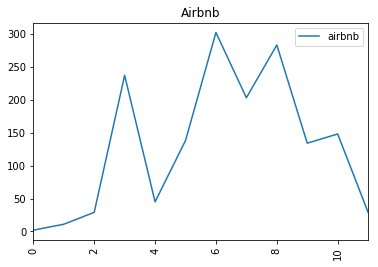

In [78]:
airbnb_sum.plot(kind='line', rot=90, title='Airbnb')

In [78]:
#file path
hotel_file = 'data/equip-tour-transp-infra-2016.xls'

hotel = pd.read_excel(hotel_file, skiprows=5)

In [79]:
hotel['IRIS'] = hotel['IRIS'].astype('str')

In [80]:
hotel_m2 = iris_selection.merge(hotel, left_on='code_iris', right_on='IRIS')

In [81]:
hotel_count = hotel_m2.groupby(['ligne'], sort=False).NB_G102.sum()

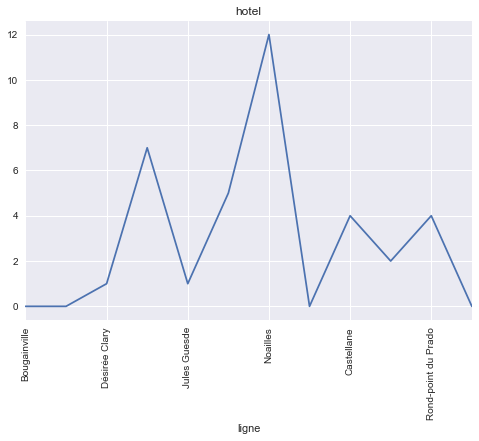

In [82]:
hotel_count.plot(kind='line', rot=90, title='hotel')

## Commerces

In [79]:
#file path
commerce_file = 'data/equip-serv-commerce-infra-2016.xls'

commerce = pd.read_excel(commerce_file, skiprows=5)

commerce['IRIS'] = commerce['IRIS'].astype('str')

commerce_m2 = iris_selection.merge(commerce, left_on='code_iris', right_on='IRIS')

In [80]:
#file path
service_file = 'data/equip-serv-particuliers-infra-2016.xls'

service = pd.read_excel(service_file, skiprows=5)

service['IRIS'] = service['IRIS'].astype('str')

service_m2 = iris_selection.merge(service, left_on='code_iris', right_on='IRIS')

In [81]:
#NB_A507 --> soins de beauté
#NB_A501 --> coiffeur
#NB_A301 --> réparation auto
#NB_A504 --> restaurant
#NB_A505 --> agence immobilière
#NB_A203 --> banque

service_m2 = service_m2[['ligne', 'NB_A501', 'NB_A301', 'NB_A203', 'NB_A504']]

service_select = service_m2.groupby(['ligne'], sort=False)['NB_A501', 'NB_A301', 'NB_A203', 'NB_A504'].sum()

In [82]:
service_select = service_select.reset_index()

In [83]:
service_select = service_select.rename(columns={'NB_A501': 'coiffeur', 'NB_A301': 'voiture', 'NB_A203': 'banque', 'NB_A504': 'restaurant' })

In [84]:
service_select

,ligne,coiffeur,voiture,banque,restaurant
0,Bougainville,2,19,2,31
1,National,2,16,1,12
2,Désirée Clary,9,1,1,29
3,Joliette,10,8,29,113
4,Jules Guesde,13,10,9,39
5,Saint-Charles,12,9,5,91
6,Noailles,36,1,13,215
7,Notre-Dame-du-Mont - Cours Julien,21,5,6,151
8,Castellane,50,35,17,181
9,Périer,18,5,14,35


#### Can't find iris Bellevue Caravalle

In [85]:
#NB_B202 --> epicerie
#NB_B203 --> boulangerie
#NB_B204 --> charcuterie
#NB_B311 --> horlogerie, bijouterie
#NB_B313 --> magasin d'optique

commerce_m2 = commerce_m2[['ligne','NB_B203']]

In [86]:
petit_commerce = commerce_m2.groupby(['ligne'], sort=False)['NB_B203'].sum()

In [87]:
petit_commerce = petit_commerce.reset_index()

In [88]:
petit_commerce = petit_commerce.rename(columns={'NB_B203': 'boulangerie' })

## Action sociale

In [114]:
#file path
social_file = 'data/equip-serv-action-sociale-infra-2016.xls'

social = pd.read_excel(social_file, skiprows=5)

In [115]:
social['IRIS'] = social['IRIS'].astype('str')

In [116]:
social_m2 = iris_selection.merge(social, left_on='code_iris', right_on='IRIS')

In [117]:
creches = social_m2.groupby(['ligne'], sort=False).NB_D402.sum()

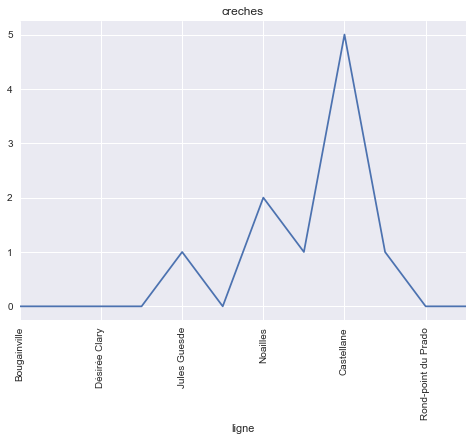

In [118]:
creches.plot(kind='line', rot=90, title='creches')

## Health

In [89]:
#file path
health_file = 'data/equip-serv-medical-para-infra-2016.xls'

health = pd.read_excel(health_file, skiprows=5)

In [90]:
health['IRIS'] = health['IRIS'].astype('str')

In [91]:
health_m2 = iris_selection.merge(health, left_on='code_iris', right_on='IRIS')

In [92]:
omnipraticien = health_m2.groupby(['ligne'], sort=False).NB_D201.sum()

In [93]:
omnipraticien

ligne
Bougainville                         11
National                              0
Désirée Clary                        24
Joliette                              8
Jules Guesde                         13
Saint-Charles                         8
Noailles                             28
Notre-Dame-du-Mont - Cours Julien    11
Castellane                           40
Périer                               44
Rond-point du Prado                  68
Sainte-Marguerite Dromel              7
Name: NB_D201, dtype: int64

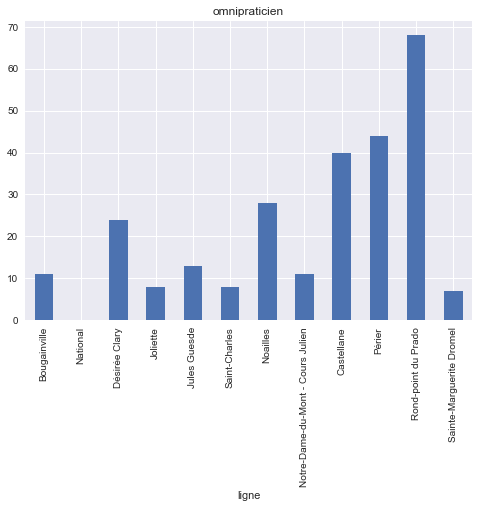

In [125]:
omnipraticien.plot(kind='bar', rot=90, title='omnipraticien')

#omnipraticien

In [100]:
omnipraticien = omnipraticien.reset_index()
omnipraticien = omnipraticien.rename(columns={'NB_D201': 'omnipraticien'})

In [101]:
omnipraticien

,ligne,omnipraticien
0,Bougainville,11
1,National,0
2,Désirée Clary,24
3,Joliette,8
4,Jules Guesde,13
5,Saint-Charles,8
6,Noailles,28
7,Notre-Dame-du-Mont - Cours Julien,11
8,Castellane,40
9,Périer,44


## Arbres

Data from Open Street Map, extracted on February 20 2018

In [49]:
#file path
tree_file = 'data/tree_m2.csv'

tree = pd.read_csv(tree_file)

In [51]:
tree['Ligne'] = pd.Categorical(tree['Ligne'], ["Bougainville", "National", "Désirée Clary", "Joliette", "Jules Guesde", "Saint-Charles", "Noailles", "Notre-Dame-du-Mont - Cours Julien", "Castellane", "Périer", "Rond-point du Prado", "Sainte-Marguerite Dromel"])

In [52]:
tree_sum = tree.groupby(['Ligne']).NUMPOINTS.sum()

In [53]:
tree_sum

Ligne
Bougainville                          49
National                             146
Désirée Clary                         31
Joliette                             782
Jules Guesde                         172
Saint-Charles                        320
Noailles                             415
Notre-Dame-du-Mont - Cours Julien    187
Castellane                             1
Périer                                17
Rond-point du Prado                  136
Sainte-Marguerite Dromel              56
Name: NUMPOINTS, dtype: int64

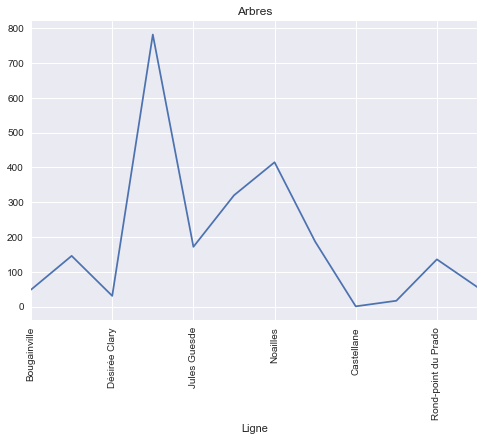

In [54]:
tree_sum.plot(kind='line', rot=90, title='Arbres')

## Final Export

In [112]:
dfs = [population_m2_immigration_df, population_m2_pop_age, revenu_m2_median, omnipraticien, service_select, population_active_m2_1564, airbnb_sum, population_density, famille_m2_selection]

In [108]:
dfs

[                                ligne       P14_POP  P14_POP_ETR  \
 0                        Bougainville   4565.140065   921.880235   
 1                            National   6842.917103  1598.278675   
 2                       Désirée Clary   7739.253046  1541.305142   
 3                            Joliette   7981.623750  1398.205066   
 4                        Jules Guesde  10094.498828  2762.058697   
 5                       Saint-Charles   9172.188066  2657.487245   
 6                            Noailles   9751.941774  2486.107973   
 7   Notre-Dame-du-Mont - Cours Julien   7081.357702   735.306139   
 8                          Castellane  15830.686559  1256.791344   
 9                              Périer  11725.493630   863.719042   
 10                Rond-point du Prado  12163.482732   705.319900   
 11           Sainte-Marguerite Dromel   7068.945821   447.247166   
 
       P14_POP_FR  P14_POP_IMM  percent_immigration  percent_francais  \
 0    3643.259830  1031.2481

In [113]:
export = reduce(lambda left,right: pd.merge(left,right,on='ligne'), dfs)

In [114]:
export

,ligne,P14_POP,P14_POP_ETR,P14_POP_FR,P14_POP_IMM,percent_immigration,percent_francais,percent_etranger,total_under_18,total_over_65,...,C14_COUPAENF,C14_FAMMONO,C14_COUPSENF,C14_NE24F0,C14_NE24F1,C14_NE24F2,C14_NE24F3,C14_NE24F4P,percent_fammono,percent_fam3enf
0,Bougainville,4565.140065,921.880235,3643.259830,1031.248182,22.589629,79.806091,20.193909,1375.637250,728.922304,...,414.939016,376.535068,301.011237,373.413140,247.350968,252.322244,117.750303,101.648666,34.465916,20.082555
1,National,6842.917103,1598.278675,5244.638428,2234.402124,32.652772,76.643314,23.356686,2450.522613,645.977916,...,707.495140,518.807662,244.667348,344.739392,299.037374,290.303503,263.120360,273.769520,35.269761,36.499033
2,Désirée Clary,7739.253046,1541.305142,6197.947904,2082.572217,26.909215,80.084575,19.915425,1896.160080,1384.781476,...,652.045935,632.262093,594.857455,799.848063,437.828564,306.142821,203.157582,132.188454,33.645898,17.845477
3,Joliette,7981.623750,1398.205066,6583.418683,1780.759093,22.310737,82.482198,17.517802,1834.313696,893.933679,...,763.867390,467.172563,608.541783,696.011569,524.760537,393.812059,174.340628,50.656942,25.395586,12.230909
4,Jules Guesde,10094.498828,2762.058697,7332.440131,3394.946341,33.631648,72.637981,27.362019,2263.987304,1731.597571,...,890.866271,619.505474,537.564035,745.469557,458.284829,443.677823,252.775299,147.728271,30.250239,19.556452
5,Saint-Charles,9172.188066,2657.487245,6514.700821,3294.030489,35.913246,71.026682,28.973318,2094.468093,1045.560933,...,783.141496,544.832822,593.823913,681.740200,591.811609,302.580768,204.486206,141.179449,28.350157,17.986574
6,Noailles,9751.941774,2486.107973,7265.833801,3275.283760,33.585965,74.506534,25.493466,1903.339606,1073.483504,...,632.544981,551.858567,582.013834,691.540043,506.744860,322.085616,151.062153,94.984709,31.241686,13.929146
7,Notre-Dame-du-Mont - Cours Julien,7081.357702,735.306139,6346.051563,1014.449601,14.325637,89.616311,10.383689,1270.731746,907.614875,...,556.900632,415.039209,644.466340,710.224099,506.723973,292.280063,80.870532,26.307516,25.676666,6.630638
8,Castellane,15830.686559,1256.791344,14573.895215,1916.118969,12.103827,92.061043,7.938957,2468.102121,3369.555129,...,1279.830182,811.421977,1554.356469,1790.895001,1032.720087,585.233729,171.604777,65.155035,22.257517,6.494384
9,Périer,11725.493630,863.719042,10861.774588,1379.566432,11.765530,92.633836,7.366164,2128.091997,2701.272106,...,1232.124223,502.103949,1201.913930,1378.864038,736.950911,588.902013,180.480544,50.944595,17.100805,7.881946


In [116]:
export_selected = export[['ligne', 'percent_immigration', 'percent_francais', 'percent_etranger', 'percent_under18', 'revenue', 'omnipraticien', 'restaurant', 'airbnb', 'percent_over65',  'percent_fammono', 'percent_fam3enf']]

In [118]:
export_selected.to_csv('export.csv', index=False, float_format='%.1f')